In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Goals

# Takeaways

# Plan

# Acquire

- read in master .csv file of original 8 .csv files.

- read in 225 rows and 9 columns.

- read in file with 'Date' column as DatetimeIndex.

In [2]:
df = pd.read_csv('fitbit_master.csv', index_col='Date', parse_dates=True)

In [3]:
df.shape

(225, 9)

# Prepare

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225 entries, 2018-04-26 to 2018-12-06
Data columns (total 9 columns):
Calories Burned           225 non-null int64
Steps                     225 non-null int64
Distance                  225 non-null float64
Floors                    225 non-null int64
Minutes Sedentary         225 non-null int64
Minutes Lightly Active    225 non-null int64
Minutes Fairly Active     225 non-null int64
Minutes Very Active       225 non-null int64
Activity Calories         225 non-null int64
dtypes: float64(1), int64(8)
memory usage: 17.6 KB


## Resample by Day by Sum

In [5]:
df.resample('D').sum()

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Date,,,,,,,,,
2018-04-26,2635,2931,1.4,2,1347,93,0,0,566
2018-04-27,3649,9971,4.7,19,1158,219,46,17,1752
2018-04-28,3379,3521,1.7,2,702,155,22,11,1124
2018-04-29,2851,1639,0.8,0,891,122,0,0,602
2018-04-30,2825,1323,0.6,0,880,104,0,0,540
2018-05-01,3292,2581,1.2,0,919,167,13,2,1068
2018-05-02,2660,1372,0.7,0,927,90,0,0,419
2018-05-03,3121,2232,1.1,0,876,157,16,0,1006
2018-05-04,2522,904,0.4,1,1012,61,0,0,269


## Check Latest Date

- 2018-12-06

- projection will be two weeks out from this date

In [6]:
df.index.min()

Timestamp('2018-04-26 00:00:00')

In [7]:
df.index.max()

Timestamp('2018-12-06 00:00:00')

## Rename Columns

In [8]:
df.columns

Index(['Calories Burned', 'Steps', 'Distance', 'Floors', 'Minutes Sedentary',
       'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories'],
      dtype='object')

In [9]:
df.rename(columns={'Calories Burned': 'calories_burned', 'Steps': 'steps', 'Distance': 'distance', 
                  'Floors': 'floors', 'Minutes Sedentary': 'sedentary_mins', 'Minutes Lightly Active': 'lightly_active_mins',
                  'Minutes Fairly Active': 'fairly_active_mins', 'Minutes Very Active': 'very_active_mins', 
                'Activity Calories': 'activity_calories'}, inplace=True)

In [10]:
df.head()

,calories_burned,steps,distance,floors,sedentary_mins,lightly_active_mins,fairly_active_mins,very_active_mins,activity_calories
Date,,,,,,,,,
2018-04-26,2635,2931,1.4,2,1347,93,0,0,566
2018-04-27,3649,9971,4.7,19,1158,219,46,17,1752
2018-04-28,3379,3521,1.7,2,702,155,22,11,1124
2018-04-29,2851,1639,0.8,0,891,122,0,0,602
2018-04-30,2825,1323,0.6,0,880,104,0,0,540


In [11]:
df.shape

(225, 9)

## Add a Month Column

In [12]:
df['month'] = df.index.month

## Add a Day of the Week Column

In [13]:
df['weekday'] = df.index.weekday_name

In [14]:
df.head(1)

,calories_burned,steps,distance,floors,sedentary_mins,lightly_active_mins,fairly_active_mins,very_active_mins,activity_calories,month,weekday
Date,,,,,,,,,,,
2018-04-26,2635,2931,1.4,2,1347,93,0,0,566,4,Thursday


# Explore

- Begin stage with 225 rows, 11 columns

- 33 Thursdays, 32 each Friday through Wednesday

    - We will drop the first row which is a Thursday to keep weekday count equal.

In [15]:
# retrieve a weekday count, drop the first Thursday '2018-04-26'

df['weekday'].value_counts()

Thursday     33
Friday       32
Monday       32
Tuesday      32
Saturday     32
Wednesday    32
Sunday       32
Name: weekday, dtype: int64

## Equalize Weekdays

- drop the first row leaving us with 224 rows, 11 columns

In [24]:
df = df[df.index != "2018-04-26"]

In [28]:
df.head(1)

,calories_burned,steps,distance,floors,sedentary_mins,lightly_active_mins,fairly_active_mins,very_active_mins,activity_calories,month,weekday
Date,,,,,,,,,,,
2018-04-27,3649,9971,4.7,19,1158,219,46,17,1752,4,Friday


In [29]:
df.shape

(224, 11)

## Look at Days with 0 Steps

- There are 0 values for steps in the following dates/date ranges

    - 6/6 - 6/7
    - 6/11
    - 6/26 - 6/30
    - 7/3 - 7/6
    
- We will look for trends before and after the breaks to decide how to handle these rows.

In [55]:
df[df['steps'] == 0]

,calories_burned,steps,distance,floors,sedentary_mins,lightly_active_mins,fairly_active_mins,very_active_mins,activity_calories,month,weekday
Date,,,,,,,,,,,
2018-06-06,2145,0,0.0,0,1440,0,0,0,0,6,Wednesday
2018-06-07,2146,0,0.0,0,1440,0,0,0,0,6,Thursday
2018-06-11,2146,0,0.0,0,1440,0,0,0,0,6,Monday
2018-06-26,2144,0,0.0,0,1440,0,0,0,0,6,Tuesday
2018-06-27,2145,0,0.0,0,1440,0,0,0,0,6,Wednesday
2018-06-28,2145,0,0.0,0,1440,0,0,0,0,6,Thursday
2018-06-29,2180,0,0.0,0,1437,3,0,0,39,6,Friday
2018-06-30,2145,0,0.0,0,1440,0,0,0,0,6,Saturday
2018-07-03,2144,0,0.0,0,1440,0,0,0,0,7,Tuesday


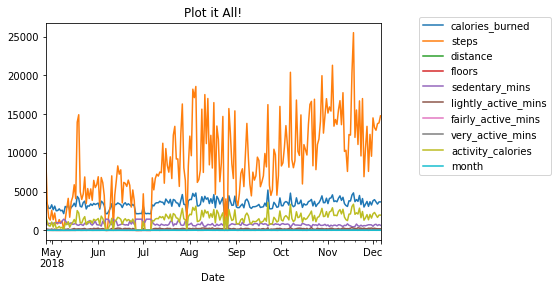

In [30]:
df.plot()

plt.title('Plot it All!')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [1]:

df['calories_burned'].plot(figsize=(12,6))

plt.xlabel('By Day')
plt.ylabel('Calories')
plt.title('Calories Burned by Day')
plt.show()

NameError: name 'df' is not defined

In [ ]:
df['steps'].plot()

plt.xlabel('By Day')
plt.ylabel('Calories')
plt.title('Calories Burned by Day')
plt.show()

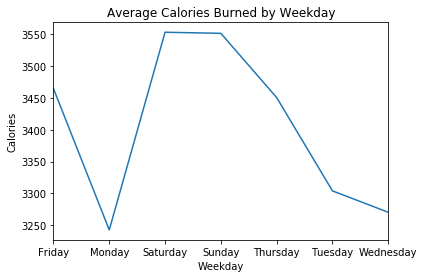

In [34]:
df.groupby(['weekday'])['calories_burned'].mean().plot()

plt.xlabel('Weekday')
plt.ylabel('Calories')
plt.title('Average Calories Burned by Weekday')
plt.show()

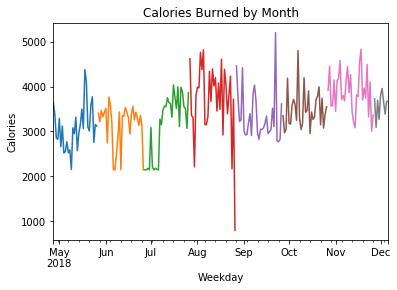

In [52]:
df['calories_burned']['2018-04-27':'2018-05-26'].plot()
df['calories_burned']['2018-05-27':'2018-06-26'].plot()
df['calories_burned']['2018-06-27':'2018-07-26'].plot()
df['calories_burned']['2018-07-27':'2018-08-26'].plot()
df['calories_burned']['2018-08-27':'2018-09-26'].plot()
df['calories_burned']['2018-09-27':'2018-10-26'].plot()
df['calories_burned']['2018-10-27':'2018-11-26'].plot()
df['calories_burned']['2018-11-27':'2018-12-06'].plot()

plt.xlabel('Weekday')
plt.ylabel('Calories')
plt.title('Calories Burned by Month')
plt.show()

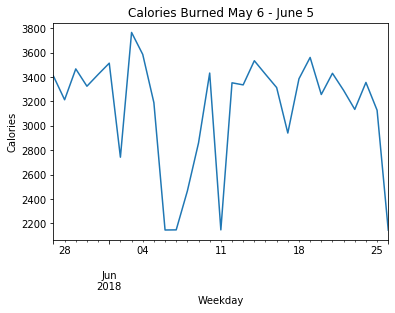

In [44]:
df['calories_burned']['2018-05-27':'2018-06-26'].plot()

plt.xlabel('Weekday')
plt.ylabel('Calories')
plt.title('Calories Burned May 6 - June 5')
plt.show()

## More Calories Burned on the Weekend

In [ ]:
df.groupby(['weekday']).calories_burned.mean()

In [ ]:
df.groupby(['weekday']).calories_burned.mean().plot.bar()

plt.title('Calories Burned by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Calories')
plt.show()

# Model

# Forecast

# Final Takeaways

- Faith:


- Sean: